In [80]:
import scipy
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import seaborn as sns

from src.HamMethods import ham_vanilla, ham_solved
from src.CorrFuncs import trend_est, covariance_matrix

Initialize data

In [89]:
x = np.array([2,6,11])
Nx = np.array([337,167,186,212])
M1x = 451
Lx = np.array([np.log(0.80),np.log(1.16),np.log(1.57)])
vx = np.array([0.0542,0.0563,0.0563])
A0 = M1x*Nx[1:]/(Nx.sum())

In [90]:
a0 = 165
b0 = 172
B = np.array([93,96,90])
# Construct true p and z values to pass in to hamling
B0sum = np.sum(B) + b0

p0 = b0 / B0sum
z0 = B0sum / M1x

# Create initialization vector
x_feas = np.array([10/np.min(vx),10/np.min(vx)])

#### OR Example where everything works

In [91]:
A_fith, B_fith, a0_fith, b0_fith = ham_vanilla(p0,z0,Lx,vx,np.array([a0,b0]))
A_fith

Optimization results:       fun: 3.7254864679456837e-10
 hess_inv: array([[6144.89733454, 3909.97483207],
       [3909.97483207, 6591.94908009]])
      jac: array([-1.37371661e-07, -2.31259192e-07])
  message: 'Optimization terminated successfully.'
     nfev: 78
      nit: 15
     njev: 26
   status: 0
  success: True
        x: array([ 96.26992359, 103.79444345])


array([50.96842138, 57.22200793, 67.70428642])

In [92]:
a0_fith

96.26992358923333

In [93]:
b_hamh, v_hamh = trend_est(A_fith,B_fith,a0_fith,b0_fith,vx,x,Lx)

In [94]:
b_hamh

0.04588480137880012

In [95]:
v_hamh

0.000420818983411542

In [96]:
A_fits, B_fits, a0_fits, b0_fits = ham_vanilla(p0,z0,Lx,vx,x_feas)
A_fits

Optimization results:       fun: 1.521453447336725e-08
 hess_inv: array([[5979.44407566, 3830.26456064],
       [3830.26456064, 5717.03589146]])
      jac: array([-2.60259339e-06,  2.39270754e-06])
  message: 'Optimization terminated successfully.'
     nfev: 90
      nit: 20
     njev: 30
   status: 0
  success: True
        x: array([ 96.2653051 , 103.80232282])


array([50.9653846 , 57.21796661, 67.69887927])

In [97]:
a0_fits

96.26530509583982

In [98]:
b_hams, v_hams = trend_est(A_fits,B_fits,a0_fits,b0_fits,vx,x,Lx)

In [99]:
b_hams

0.045884642101636106

In [100]:
v_hams

0.0004208192341737844

Create Covariance Matrix Plot

In [101]:
C1 = covariance_matrix(A_fits,B_fits,a0_fits,b0_fits,vx)

In [102]:
C1

array([[0.0542    , 0.02002165, 0.02002165],
       [0.02002165, 0.0563    , 0.02002165],
       [0.02002165, 0.02002165, 0.0563    ]])

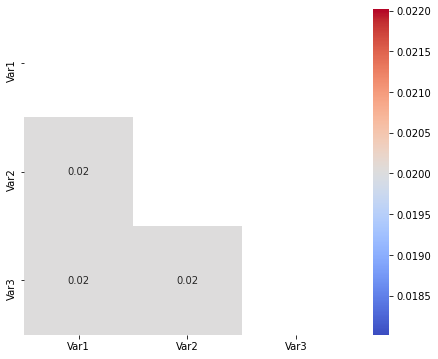

In [107]:
# Use seaborn's heatmap function which has an option to mask parts of the matrix
mask = np.triu(np.ones_like(C1, dtype=bool))  # Mask for the upper triangle

plt.figure(figsize=(8, 6))
sns.heatmap(C1, annot=True, fmt=".2f", mask=mask, cmap='coolwarm', cbar=True, square=True,
            xticklabels=[f'Var{i+1}' for i in range(3)], 
            yticklabels=[f'Var{i+1}' for i in range(3)])
# plt.title('Upper Triangle of Covariance Matrix--Solved Hamling')
plt.savefig("images/ham_solved_covar.png")
plt.show()

#### Another OR example where everything works (but it's hidden as RR)

In [9]:
x = np.array([9.06,27.,45.,64.8])
Nx = np.array([414,261,228,44,34])
A0 = np.array([61,69,22,19])
B = Nx[1:] - A0
a0 = 126
b0 = Nx[0] - a0
M1x = np.sum(A0) + a0
Lx = np.array([-0.2231435,-0.0001,0.5306283,0.8754687])
vx = np.array([0.2233380,0.2337519,0.3765137,0.4440046])
vx = vx**2
# Lx = np.log((A0*b0)/(a0*B))
# vx = 1/a0 - 1/b0 + 1/A0 - 1/B

In [10]:
A_fith, B_fith, a0_fith, b0_fith = ham_vanilla(b0,B,M1x,Lx,vx,a0)

In [11]:
A_fith

array([42.86671822, 39.59811018, 14.0486192 , 11.37901951])

In [12]:
B_fith

array([124.55384629,  92.05445382,  19.20930333,  11.02098809])

In [13]:
a0_fith

77.21190403475387

In [14]:
covariance_matrix(A_fith,B_fith,a0_fith,b0_fith,vx)

array([[0.04987986, 0.01852308, 0.01852308, 0.01852308],
       [0.01852308, 0.05463995, 0.01852308, 0.01852308],
       [0.01852308, 0.01852308, 0.14176257, 0.01852308],
       [0.01852308, 0.01852308, 0.01852308, 0.19714008]])

In [15]:
A_fits, B_fits, a0_fits, b0_fits = ham_solved(b0,B,M1x,Lx,vx,a0)

In [16]:
covariance_matrix(A_fits,B_fits,a0_fits,b0_fits,vx)

array([[0.04987986, 0.01852028, 0.01852028, 0.01852028],
       [0.01852028, 0.05463995, 0.01852028, 0.01852028],
       [0.01852028, 0.01852028, 0.14176257, 0.01852028],
       [0.01852028, 0.01852028, 0.01852028, 0.19714008]])

In [17]:
A_fits

array([42.86323567, 39.59541784, 14.04849145, 11.37902797])

In [21]:
a0_fits

77.2243631435358

In [22]:
B_fits

array([124.53969108,  92.04521175,  19.20850611,  11.02063911])

#### RR example where everything works

In [25]:
x = np.array([1.8286, 9.1992, 22.8571, 35.6667, 58.4257])
A = np.array([38, 43, 32, 16, 27])
a0 = 28
M1 = np.sum(A) + a0
B = np.array([43030.54, 53088.96, 45348.09, 19790.79, 19919.85])
b0 = 22185.73
L = np.array([-0.41673, -0.39555, -0.48842, -0.27903, 0.20232])
v = np.array([0.2510976, 0.2456013, 0.2633819, 0.3208115, 0.2861643])
v *= v

# Construct true p and z values to pass in to hamling
B0sum = np.sum(B) + b0

p0 = b0 / B0sum
z0 = B0sum / M1x

# Create initialization vector
x_feas = np.array([10/np.min(vx),10/np.min(vx)])

In [31]:
A_fith, B_fith, a0_fith, b0_fith = ham_vanilla(p0,z0,L,v,x_feas,OR=False)

Optimization results:       fun: 1.4827367857513542e-09
 hess_inv: array([[8.20981989e+01, 3.11104175e+04],
       [3.11104175e+04, 5.18726994e+07]])
      jac: array([1.30487015e-06, 6.73438334e-09])
  message: 'Optimization terminated successfully.'
     nfev: 135
      nit: 15
     njev: 45
   status: 0
  success: True
        x: array([  26.40870677, 8832.44755667])


In [32]:
A_fith

array([39.45258379, 44.22344379, 31.57058291, 15.31049443, 22.57383232])

In [33]:
B_fith

array([20016.72042125, 21967.04676155, 17208.16828436,  6768.68554113,
        6166.98324066])

In [6]:
b_hRR, se_hRR = trend_est(A_fith,B_fith,a0_fith,b0_fith,v,x,L,unadj=False)

In [8]:
b_hRR

0.006307971893180575

In [9]:
se_hRR

1.5490034185858116e-05

This matches! In other words, our vanilla Hamling copy matches what $\verb+dosresmeta+$ gives.

Next, we make sure our method also gives the same result

In [11]:
A_fits, B_fits, a0_fits, b0_fits = ham_solved(b0,B,M1,L,v,a0,OR=False)

In [12]:
A_fits

array([39.51239758, 44.2934568 , 31.61369796, 15.33310551, 22.62742335])

In [13]:
a0_fits

26.449454769982697

In [14]:
trend_est(A_fits,B_fits,a0_fits,b0_fits,v,x,L,unadj=True)

(0.006333423042905303,
 1.543672379583075e-05,
 -0.002945971690368591,
 1.5864902051567542e-05)

#### Example where normal Hamling breaks but our method works

In [51]:
x = np.array([9.06,27.,45.,64.8])
Nx = np.array([414,261,228,44,34])
A0 = np.array([61,69,22,19])
B = Nx[1:] - A0
a0 = 126
b0 = Nx[0] - a0
M1x = np.sum(A0) + a0
Lx = np.array([-0.2231435,-0.0001,0.5306283,0.8754687])
# vx = np.array([0.001,0.01,0.2,0.9])
# vx = np.array([0.01,0.01,0.1,0.1])
vx = np.array([0.000001,0.1,0.1,0.9])
# vx = np.array([100,100,100,100])
# vx = vx**2
# vx = np.array([0.2233380,0.2337519,0.3765137,0.4440046])
# vx = vx**2

# Construct true p and z values to pass in to hamling
B0sum = np.sum(B) + b0

p0 = b0 / B0sum
z0 = B0sum / M1x

# Create initialization vector
x_feas = np.array([10/np.min(vx),10/np.min(vx)])

In [65]:
vx_list = []
vx_init = np.array([0.000001,0.1,0.1,0.9])
for i in range(7):
    vx_new = vx_init.copy()
    vx_new[0] = vx_init[0]*(10**i)
    vx_list.append(vx_new)

In [71]:
ham_vanilla(p0,z0,Lx,vx,np.array([a0,b0]))

Optimization results:       fun: 3.031881003759493e-09
 hess_inv: array([[  43.71462723,  -19.77825048],
       [ -19.77825048, 1925.82378907]])
      jac: array([-7.94924310e-06,  1.21243772e-06])
  message: 'Optimization terminated successfully.'
     nfev: 93
      nit: 24
     njev: 31
   status: 0
  success: True
        x: array([21.73864359, 71.40526681])


(array([-20.72428274,  32.61481297,  37.94402659,   2.06031943]),
 array([-85.09172021, 107.14110616,  73.31490522,   2.81981838]),
 21.738643588620928,
 71.40526681020272)

In [75]:
neg_list = []
pos_list = []
for i in range(7):
    A1 = ham_vanilla(p0,z0,Lx,vx_list[i],np.array([a0,b0]))[0][0]
    if A1 < 0:
        neg_list.append((A1,i))
    else:
        pos_list.append((A1,i))

Optimization results:       fun: 3.031881003759493e-09
 hess_inv: array([[  43.71462723,  -19.77825048],
       [ -19.77825048, 1925.82378907]])
      jac: array([-7.94924310e-06,  1.21243772e-06])
  message: 'Optimization terminated successfully.'
     nfev: 93
      nit: 24
     njev: 31
   status: 0
  success: True
        x: array([21.73864359, 71.40526681])
Optimization results:       fun: 1.4526831274039545e-10
 hess_inv: array([[  43.87959403,  -23.39784078],
       [ -23.39784078, 1847.31715361]])
      jac: array([-1.50469104e-06,  2.98117310e-07])
  message: 'Optimization terminated successfully.'
     nfev: 90
      nit: 24
     njev: 30
   status: 0
  success: True
        x: array([21.7381979 , 71.40273869])
Optimization results:       fun: 9.135871276560789e-11
 hess_inv: array([[  43.68798618,  -22.46609393],
       [ -22.46609393, 1887.32976919]])
      jac: array([-2.01090961e-06,  2.52773968e-08])
  message: 'Optimization terminated successfully.'
     nfev: 99
      

In [76]:
neg_list

[(-20.72428273704139, 0),
 (-20.726954972019747, 1),
 (-20.75104508203735, 2),
 (-88768.5530824421, 3)]

In [77]:
pos_list

[(289.4209158532763, 4), (19.487030555825207, 5), (1.3556197015320552, 6)]

In [78]:
vx_list[4]

array([0.01, 0.1 , 0.1 , 0.9 ])

In [79]:
vx_list[0:4]

[array([1.e-06, 1.e-01, 1.e-01, 9.e-01]),
 array([1.e-05, 1.e-01, 1.e-01, 9.e-01]),
 array([1.e-04, 1.e-01, 1.e-01, 9.e-01]),
 array([0.001, 0.1  , 0.1  , 0.9  ])]